In [2]:
# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다.
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.12.0


# 패션 MNIST 데이터셋 임포트하기

In [3]:
# Tensorflow에서 직접 Fashion MNIST 데이터를 가져오고 로드합니다.
fashion_mnist = keras.datasets.fashion_mnist

# load_data()를 호출하면 네 개의 NumPy 배열이 반환됩니다.
# train_images, train_labels 배열 : 모델 학습에 사용되는 훈련세트
# test_images, test_labels 배열 : 모델 테스트에 사용되는 테스트세트
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
type(train_images)

numpy.ndarray

In [4]:
# 옷 종류에 따라 클래스를 정의합니다.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색
모델을 훈련하기 전에 데이터셋의 구조를 살펴본다

In [6]:
train_labels[:3]

array([9, 0, 0], dtype=uint8)

In [5]:
# 60000개의 이미지 (28x28 pixel)
train_images.shape

# 60000개의 라벨 (클래스)
len(train_labels)

60000

In [11]:
# 각 라벨은 0 ~ 9 사이의 정수
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
# 10000개의 테스트 이미지
test_images.shape

# 10000개의 테스트 라벨
len(test_labels)

10000

# 데이터 전처리
네트워크를 훈련하기 전에 데이터를 전처리해야 합니다.

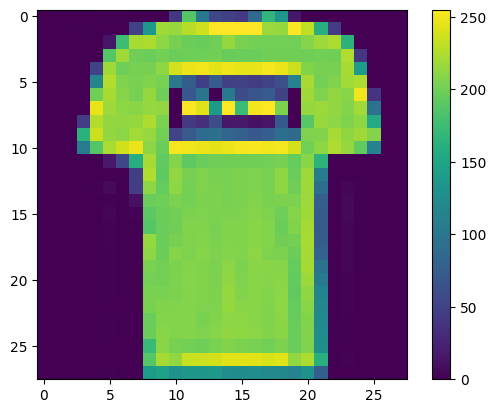

In [6]:
# 훈련 세트에 있는 첫번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알수 있습니다.
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# 신경망 모델에 주입하기 전에 값의 범위를 0 ~ 1 사이로 조정합니다.
# 이렇게 하기 위해서는 255로 나눠줘야 합니다.
train_images = train_images / 255.0
test_imates = test_images / 255.0

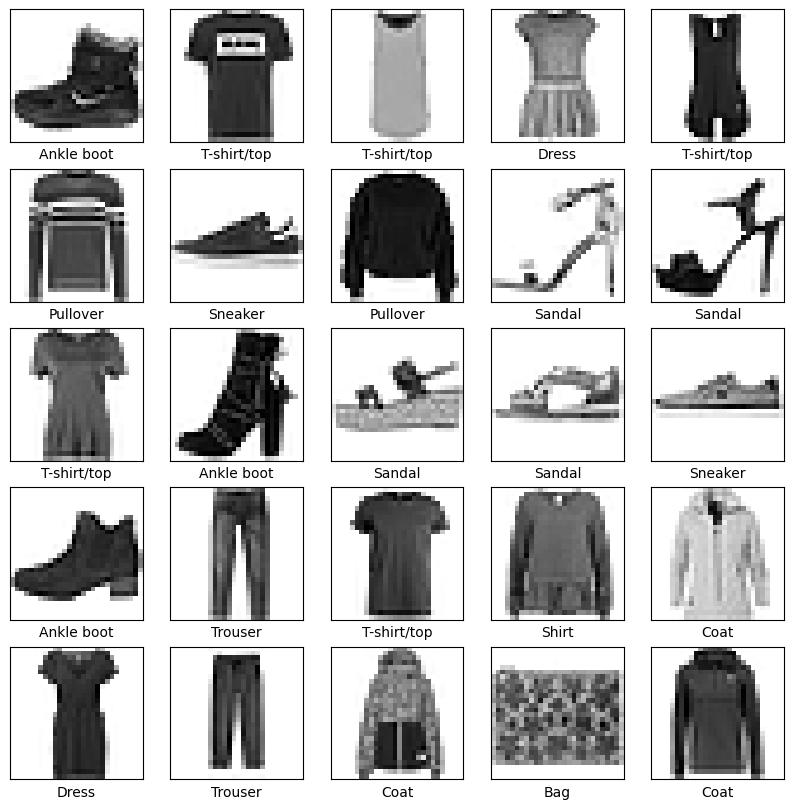

In [8]:
# 데이터 포맷이 올바른지 확인하고 네트워크 구성 및 훈련 준비를 마칩니다.
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성
신경망 모델을 만드려면 모델의 층을 구성한 다음 모델을 컴파일합니다.
 

In [9]:
# 신경망의 기본 빌딩 블록을 레이어입니다.
# 레이어는 공급된 데이터로부터 표현을 추출합니다. 이 표현을 의미가 있어야 합니다.
model = tf.keras.Sequential([
    # 2차원 배열의 이미지 포맷을 1차원 배열로 변환합니다.
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 픽셀을 펼친 후 두 개의 Dense 층이 연속되어 연결됩니다.
    # 첫번째 Dense 층은 128개의 노드(또는 뉴런)를 가집니다.
    tf.keras.layers.Dense(128, activation='relu'), 
    # 두번째 층은 10개 노드의 소프트맥스 층입니다.
    # 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1입니다.
    tf.keras.layers.Dense(10) # 두번째 Dense 층
])

# 각 노드는 현재 이미지가 10개의 클래스 중 하나에 속할 확률을 출력합니다.

In [11]:
# 모델 컴파일
# 손실 함수 - 모델이 얼마나 정확한지 측정합니다. 
#          모델을 올바른 방향으로 조정하려면 이 함수를 최소화해야 합니다.
# 옵티마이저 - 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트
# 메트릭 - 훈련 및 테스트 단계를 모니터링, 여기서는 정확도를 사용

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련

In [12]:
# 모델 피드
# 훈련을 시작하려면 model.fit 를 호출합니다.
# 모델을 훈련 데이터에 맞추기 때문에 이렇게 불립니다.
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4983 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3750 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3367 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3137 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2927 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2815 - accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2680 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2580 - accuracy: 0.9022
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2495 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.239

In [13]:
# 정확도 평가
# 다음으로, 모델이 테스트 데이터세트에서 작동하는 방식을 비교합니다.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy', test_acc)

313/313 - 1s - loss: 57.6898 - accuracy: 0.8704 - 969ms/epoch - 3ms/step

Test accuracy 0.8704000115394592


In [15]:
# 예측하기
# 훈련된 모델을 사용해 일부 이미지에 대한 예측을 수행할 수 있습니다. 
# 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환합니다.
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [16]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [17]:
# 첫번째 예측 확인
predictions[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.99999994],
      dtype=float32)

In [18]:
# 가장 높은 신뢰도를 가진 레이블을 찾습니다.
np.argmax(predictions[0])

9

In [20]:
# 결과를 확인합니다.
test_labels[0]

9

In [23]:
# 10개의 클래스에 대한 예측을 모두 그래프로 표현해보겠습니다.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

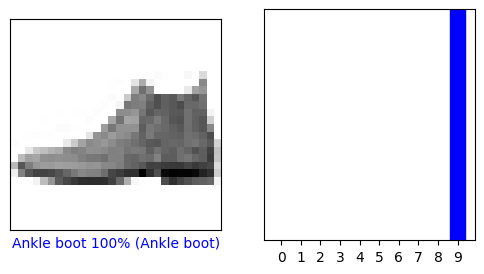

In [24]:
# 예측 확인 (0번째)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

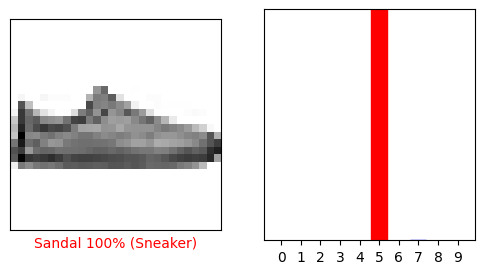

In [25]:
# 예측 확인 (12번째)
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

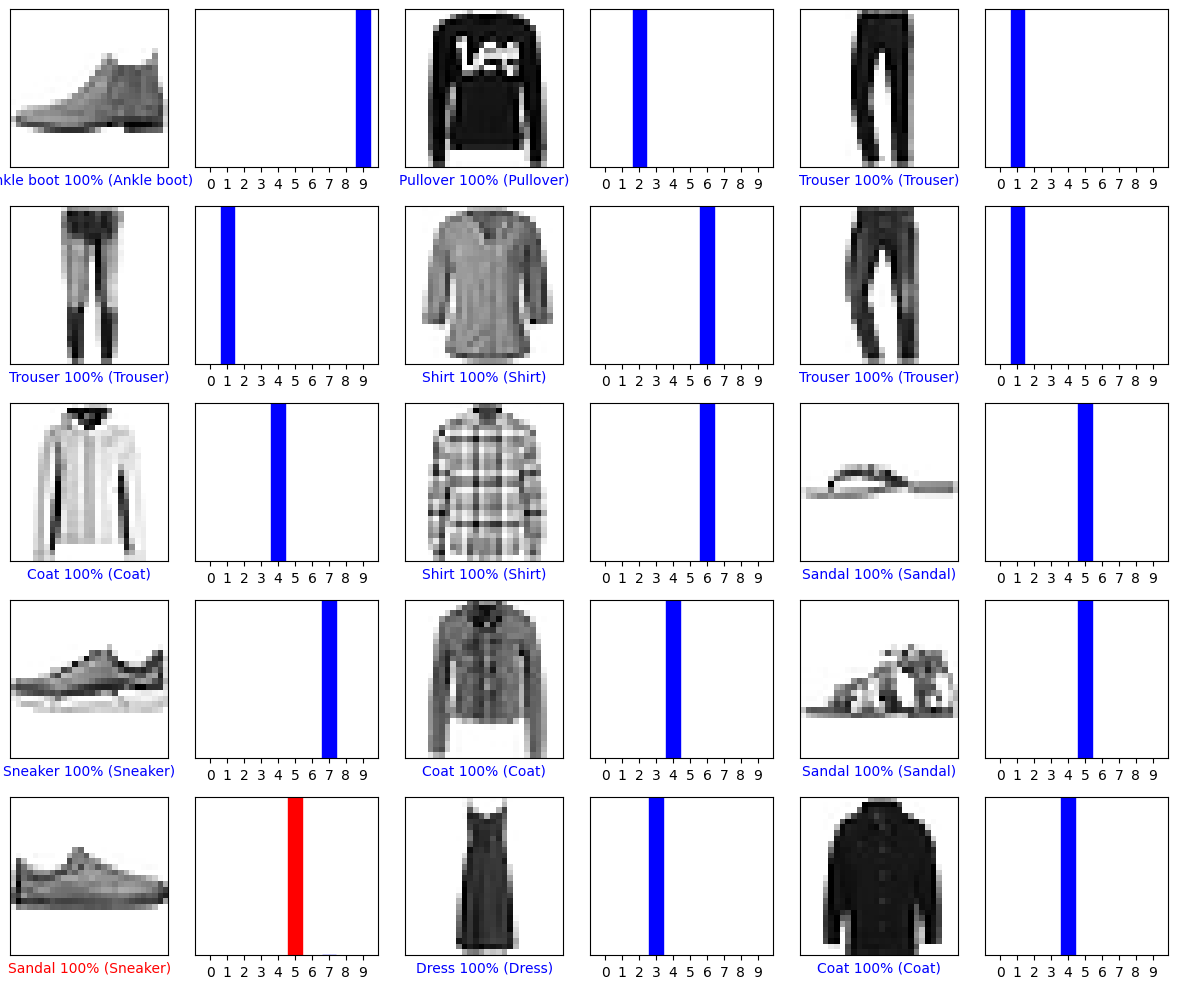

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [27]:
# 훈련된 모델 사용하기
# 훈련된 모델을 사용해 한 이미지에 대한 예측을 만든다.
img = test_images[1]

print(img.shape)

(28, 28)


In [28]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
# 이미지 예측을 만듭니다.
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


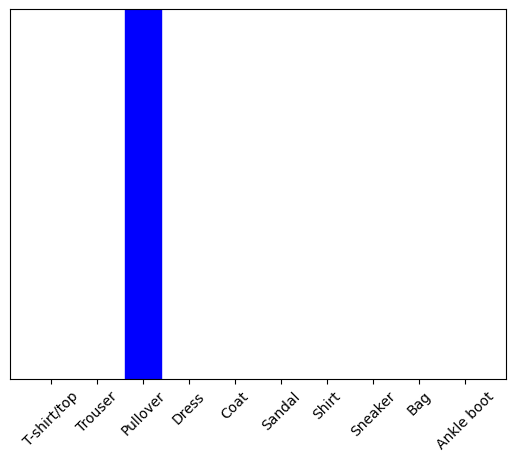

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
np.argmax(predictions_single[0])

2

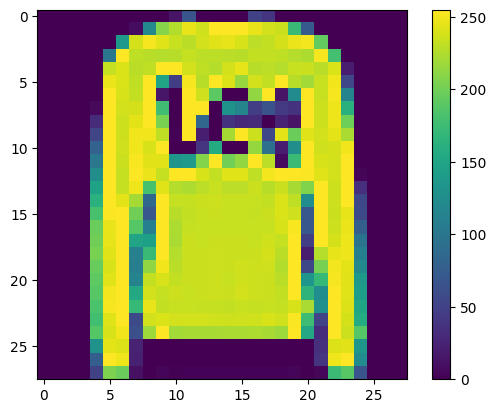

In [38]:
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [40]:
test_labels[1]

2